In [ ]:
import kagglehub
path = kagglehub.dataset_download("ascanipek/skin-diseases")
print("Path to dataset files:",path)

Path to dataset files: /kaggle/input/skin-diseases


In [ ]:
!pip install -q tensorflow matplotlib scikit-learn

import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


In [ ]:
import kagglehub
import os

path = kagglehub.dataset_download("ascanipek/skin-diseases")
DATA_DIR = os.path.join(path, "Kaggle")  # or inspect folder structure with os.listdir(path)

print("Data directory:", DATA_DIR)


Data directory: /kaggle/input/skin-diseases/Kaggle


In [ ]:
DATA_DIR = '/kaggle/input/skin-diseases'  # Adjust if your data is elsewhere
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, 'train'),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, 'val'),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATA_DIR, 'test'),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)


NotFoundError: Could not find directory /kaggle/input/skin-diseases/Kaggle/train

In [ ]:
base_model = EfficientNetB0(
    include_top=False,
    input_shape=IMG_SIZE + (3,),
    weights='imagenet'
)
base_model.trainable = False  # Freeze initial layers


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:
inputs = layers.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(6, activation='softmax')(x)
model = models.Model(inputs, outputs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop, reduce_lr, checkpoint]
)


Epoch 1/20
 67/966 ━━━━━━━━━━━━━━━━━━━━ 51:01 3s/step - accuracy: 0.4113 - loss: 1.4218

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop, reduce_lr, checkpoint]
)


Epoch 1/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 183s 173ms/step - accuracy: 0.5696 - loss: 1.1795 - val_accuracy: 0.6796 - val_loss: 0.8662 - learning_rate: 1.0000e-05
Epoch 2/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 194s 166ms/step - accuracy: 0.6501 - loss: 0.9177 - val_accuracy: 0.7018 - val_loss: 0.8109 - learning_rate: 1.0000e-05
Epoch 3/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 162s 167ms/step - accuracy: 0.6700 - loss: 0.8579 - val_accuracy: 0.7137 - val_loss: 0.7826 - learning_rate: 1.0000e-05
Epoch 4/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6827 - loss: 0.8170

966/966 ━━━━━━━━━━━━━━━━━━━━ 204s 170ms/step - accuracy: 0.6827 - loss: 0.8170 - val_accuracy: 0.7201 - val_loss: 0.7607 - learning_rate: 1.0000e-05
Epoch 5/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6943 - loss: 0.7820

966/966 ━━━━━━━━━━━━━━━━━━━━ 201s 169ms/step - accuracy: 0.6943 - loss: 0.7820 - val_accuracy: 0.7232 - val_loss: 0.7452 - learning_rate: 1.0000e-05
Epoch 6/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7020 - loss: 0.7591

966/966 ━━━━━━━━━━━━━━━━━━━━ 196s 163ms/step - accuracy: 0.7020 - loss: 0.7591 - val_accuracy: 0.7298 - val_loss: 0.7271 - learning_rate: 1.0000e-05
Epoch 7/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7113 - loss: 0.7386

966/966 ━━━━━━━━━━━━━━━━━━━━ 207s 168ms/step - accuracy: 0.7113 - loss: 0.7386 - val_accuracy: 0.7352 - val_loss: 0.7134 - learning_rate: 1.0000e-05
Epoch 8/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7164 - loss: 0.7283

966/966 ━━━━━━━━━━━━━━━━━━━━ 198s 164ms/step - accuracy: 0.7164 - loss: 0.7283 - val_accuracy: 0.7397 - val_loss: 0.7022 - learning_rate: 1.0000e-05
Epoch 9/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7283 - loss: 0.7045

966/966 ━━━━━━━━━━━━━━━━━━━━ 200s 162ms/step - accuracy: 0.7283 - loss: 0.7045 - val_accuracy: 0.7425 - val_loss: 0.6896 - learning_rate: 1.0000e-05
Epoch 10/10
966/966 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.7342 - loss: 0.6896

966/966 ━━━━━━━━━━━━━━━━━━━━ 203s 163ms/step - accuracy: 0.7342 - loss: 0.6896 - val_accuracy: 0.7487 - val_loss: 0.6807 - learning_rate: 1.0000e-05


In [ ]:
model.load_weights('best_model.h5')


**TEST **

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc:.4f}')


123/123 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.7374 - loss: 0.6643
Test accuracy: 0.7403


In [ ]:
y_true = []
y_pred = []
class_names = train_ds.class_names

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

print(classification_report(y_true, y_pred, target_names=class_names))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
model.save('skin_disease_classifier.keras')


In [ ]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()


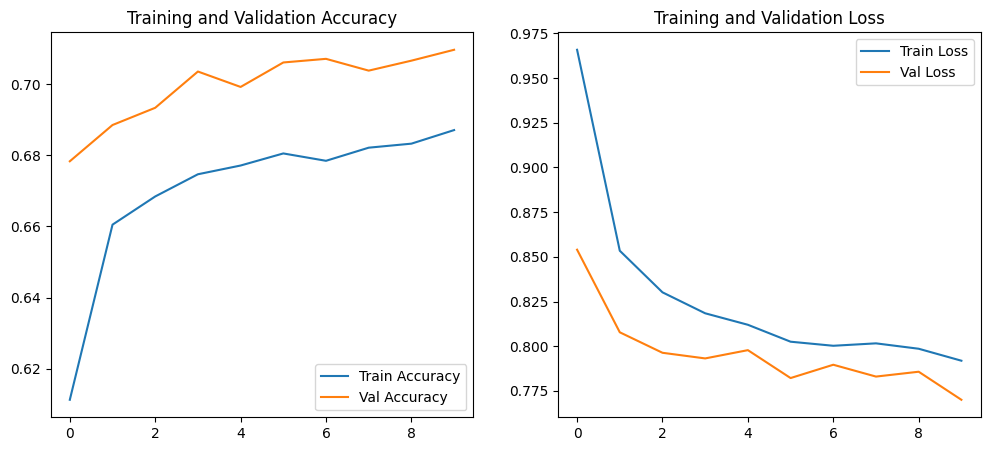

In [ ]:
plot_training_history(history)


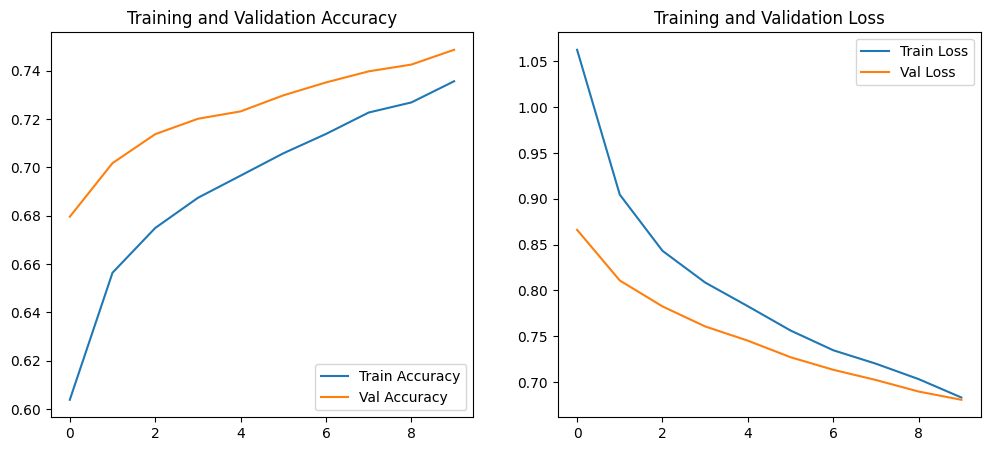

In [ ]:
plot_training_history(history_fine)


In [ ]:
from google.colab import files
files.upload()  # Upload the kaggle.json file


Saving PXL_20250514_150803672.jpg to PXL_20250514_150803672.jpg


{'PXL_20250514_150803672.jpg': b'\xff\xd8\xff\xe1P\x8bExif\x00\x00II*\x00\x08\x00\x00\x00\x0b\x00\x0f\x01\x02\x00\x07\x00\x00\x00\x92\x00\x00\x00\x10\x01\x02\x00\t\x00\x00\x00\x99\x00\x00\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00\xa2\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00\xaa\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x001\x01\x02\x00\x15\x00\x00\x00\xb2\x00\x00\x002\x01\x02\x00\x14\x00\x00\x00\xc7\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00\xdb\x00\x00\x00%\x88\x04\x00\x01\x00\x00\x00\xba\x03\x00\x00\xa7\x04\x00\x00Google\x00Pixel 6a\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00HDR+ 1.0.748116481zd\x002025:05:14 20:08:03\x00+\x00\x9a\x82\x05\x00\x01\x00\x00\x00\xe5\x02\x00\x00\x9d\x82\x05\x00\x01\x00\x00\x00\xed\x02\x00\x00"\x88\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\'\x88\x03\x00\x01\x00\x00\x00*\x00\x00\x00\x00\x90\x07\x00\x04\x00\x00\x000232\x03\x90\x02\x00\x14\x00

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


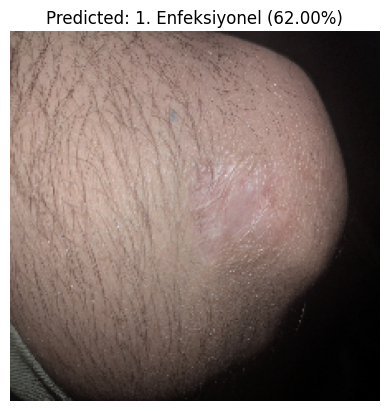

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = (224, 224)  # same as model input

def predict_image(img_path, model, class_names):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)  # batch of 1
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    predictions = model.predict(img_array)
    pred_class = class_names[np.argmax(predictions[0])]
    confidence = 100 * np.max(predictions[0])

    # Show result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {pred_class} ({confidence:.2f}%)")
    plt.show()

# Set your image path
image_path = "/content/PXL_20250514_150803672.jpg"

# Use your trained model and class names
predict_image(image_path, model, train_ds.class_names)
